## Scaling to Minimum and Maximum values - MinMaxScaling

Minimum and maximum scaling squeezes the values between 0 and 1. It subtracts the minimum value from all the observations, and then divides it by the value range:

X_scaled = (X - X.min / (X.max - X.min)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Remove 2 variables:
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [3]:
# let's separate the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((14448, 6), (6192, 6))

In [4]:
# set up the scaler
scaler = MinMaxScaler().set_output(transform="pandas")

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# the scaler stores the maximum values of the features, learned from train set

scaler.data_max_

array([1.50001000e+01, 5.20000000e+01, 1.32533333e+02, 3.40666667e+01,
       3.56820000e+04, 5.99714286e+02])

In [6]:
# tthe scaler stores the minimum values of the features, learned from train set

scaler.min_

array([-3.44753865e-02, -1.96078431e-02, -6.42548386e-03, -9.88142292e-03,
       -8.40830741e-05, -1.25216147e-03])

In [7]:
# the scaler also stores the value range (max -  min)

scaler.data_range_

array([1.45002000e+01, 5.10000000e+01, 1.31687179e+02, 3.37333333e+01,
       3.56790000e+04, 5.98964286e+02])

In [8]:
X_test_scaled.min()

MedInc        0.000000
HouseAge      0.000000
AveRooms      0.004705
AveBedrms     0.004941
Population    0.000140
AveOccup     -0.000096
dtype: float64

In [9]:
X_test_scaled.max()

MedInc        1.000000
HouseAge      1.000000
AveRooms      1.071197
AveBedrms     0.750090
Population    0.456907
AveOccup      2.074553
dtype: float64

In [10]:
plt.rcParams.update({"font.size": 15})

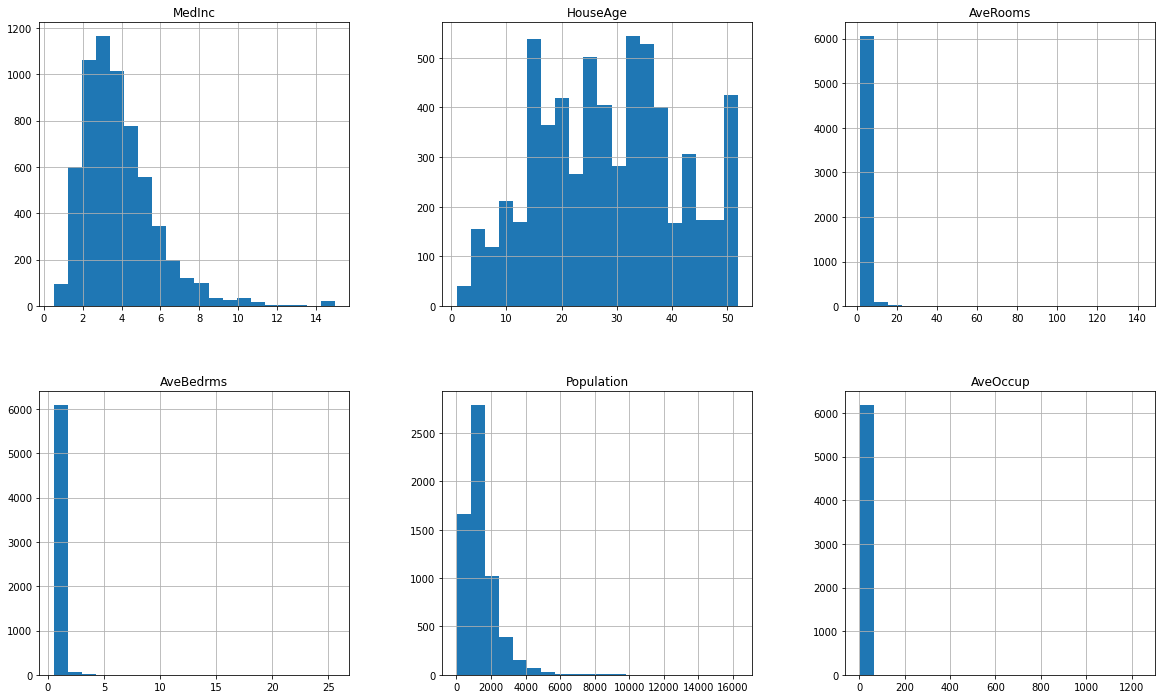

In [11]:
X_test.hist(bins=20, figsize=(20, 12), layout=(2, 3))
plt.show()

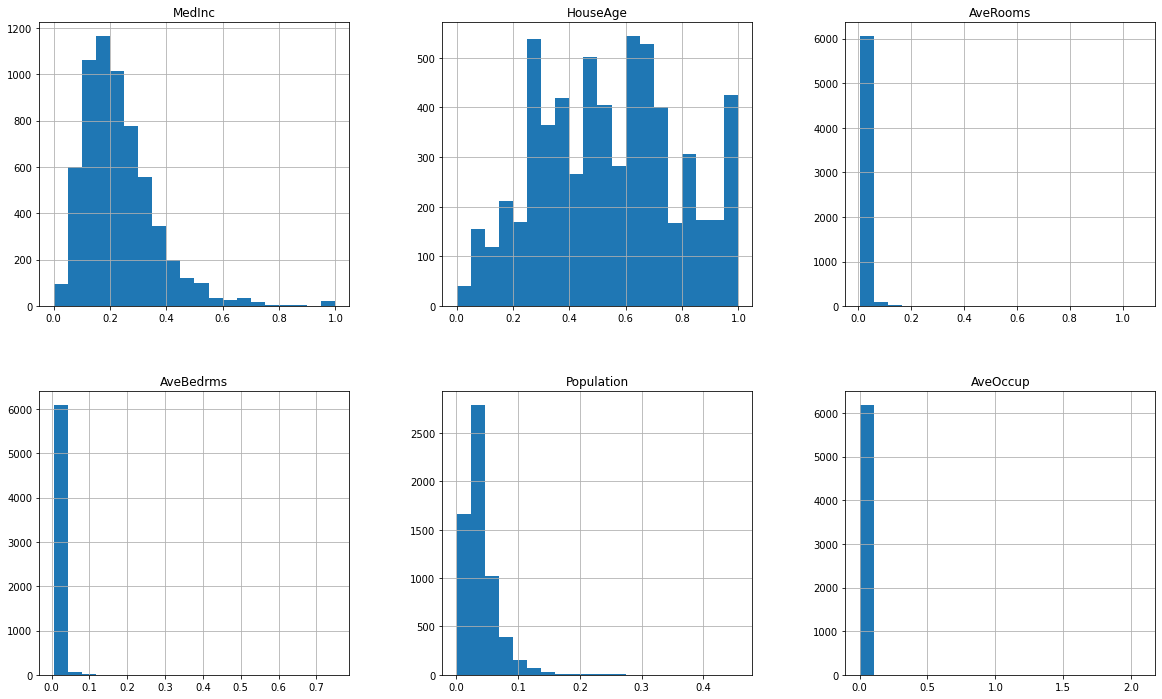

In [12]:
X_test_scaled.hist(bins=20, figsize=(20, 12), layout=(2, 3))
plt.show()